# 6.4 Machine Learning - Supervised

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [7]:
#establishing a path
path = r'C:\Users\harkn\OneDrive\Desktop\Tasks\Data Immersion\Achievement 6 - IndeGo BikeShare'

In [9]:
#importing dataframes
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_data_full.pkl'))

In [11]:
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,...,passholder_type,bike_type,start_station_name,end_station_name,trip_category_code,bike_type_code,start_date,start_time_of_day,end_date,end_time_of_day
0,579507686,70,2023-01-01 00:00:00,2023-01-01 01:10:00,3063,39.946331,-75.169800,3063,39.946331,-75.169800,...,Indego365,electric,17th & Pine,17th & Pine,0,1,2023-01-01,00:00:00,2023-01-01,01:10:00
1,579499091,17,2023-01-01 00:05:00,2023-01-01 00:22:00,3190,39.948921,-75.169907,3207,39.954411,-75.192001,...,Indego30,standard,17th & Locust,34th & Chestnut,1,0,2023-01-01,00:05:00,2023-01-01,00:22:00
2,579499089,11,2023-01-01 00:06:00,2023-01-01 00:17:00,3182,39.950809,-75.169533,3102,39.967590,-75.179520,...,Indego30,electric,17th & Sansom,Pennsylvania & Fairmount Perelman Building,1,1,2023-01-01,00:06:00,2023-01-01,00:17:00
3,579499087,1,2023-01-01 00:08:00,2023-01-01 00:09:00,3026,39.941818,-75.145500,3026,39.941818,-75.145500,...,Indego30,electric,2nd & Lombard,2nd & Lombard,0,1,2023-01-01,00:08:00,2023-01-01,00:09:00
4,579499085,27,2023-01-01 00:09:00,2023-01-01 00:36:00,3046,39.950119,-75.144722,3112,39.953732,-75.218246,...,Indego30,electric,2nd & Market,48th & Spruce,1,1,2023-01-01,00:09:00,2023-01-01,00:36:00


In [13]:
df.shape

(1084547, 23)

In [17]:
df.dtypes

trip_id                         int64
duration                        int64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_station                   int64
start_lat                     float64
start_lon                     float64
end_station                     int64
end_lat                       float64
end_lon                       float64
bike_id                         int64
plan_duration                   int64
trip_route_category            object
passholder_type                object
bike_type                      object
start_station_name             object
end_station_name               object
trip_category_code              int64
bike_type_code                  int64
start_date                     object
start_time_of_day              object
end_date                       object
end_time_of_day                object
dtype: object

In [21]:
# Convert 'trip_category_code' to boolean
df['trip_category_code'] = df['trip_category_code'].astype(bool)

In [47]:
# Convert 'bike_type_code' to boolean
df['bike_type_code'] = df['bike_type_code'].astype(bool)

In [49]:
# check for null values
df.isnull().sum()

trip_id                    0
duration                   0
start_time                 0
end_time                   0
start_station              0
start_lat                 31
start_lon                 31
end_station                0
end_lat                12154
end_lon                12154
bike_id                    0
plan_duration              0
trip_route_category        0
passholder_type            0
bike_type                  0
start_station_name         0
end_station_name           0
trip_category_code         0
bike_type_code             0
start_date                 0
start_time_of_day          0
end_date                   0
end_time_of_day            0
dtype: int64

#### Missing many 'end_lat'/'end_lon'. My guess is they were either lost or stolen.

In [52]:
# check duplicates
dups = df.duplicated()

In [54]:
dups.shape

(1084547,)

In [58]:
#no duplicates

In [60]:
df.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'start_station_name', 'end_station_name',
       'trip_category_code', 'bike_type_code', 'start_date',
       'start_time_of_day', 'end_date', 'end_time_of_day'],
      dtype='object')

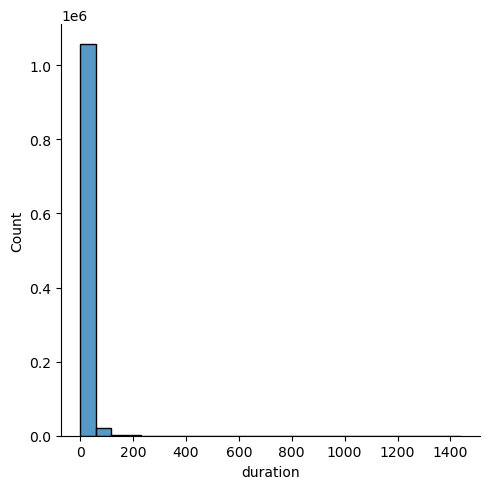

In [63]:
# checking extreme values for 'duration'
sns.displot(df['duration'], bins=25)

In [67]:
df['duration'].min()

1

In [69]:
df['duration'].max()

1440

In [71]:
df['duration'].mean()

16.197504580253323

In [73]:
df['duration'].median()

10.0

In [99]:
#creat a subset of 'full_day_rental'
full_day_rental = df[df['duration'] == 1440]

In [101]:
full_day_rental.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,...,passholder_type,bike_type,start_station_name,end_station_name,trip_category_code,bike_type_code,start_date,start_time_of_day,end_date,end_time_of_day
874,580157619,1440,2023-01-01 15:52:00,2023-01-03 11:14:00,3209,39.949001,-75.212784,3000,NaN,NaN,...,Day Pass,standard,45th & Baltimore,Virtual Station,True,False,2023-01-01,15:52:00,2023-01-03,11:14:00
1020,580013124,1440,2023-01-01 16:43:00,2023-01-02 22:32:00,3212,39.963829,-75.181770,3207,39.954411,-75.192001,...,Indego30,standard,Schuylkill Banks Pergola,34th & Chestnut,True,False,2023-01-01,16:43:00,2023-01-02,22:32:00
1375,580119282,1440,2023-01-01 21:57:00,2023-01-03 08:32:00,3261,39.963039,-75.140991,3000,NaN,NaN,...,Day Pass,standard,2nd & Brown,Virtual Station,True,False,2023-01-01,21:57:00,2023-01-03,08:32:00
3512,582969218,1440,2023-01-03 13:12:00,2023-01-11 08:30:00,3006,39.952202,-75.203110,3000,NaN,NaN,...,Day Pass,standard,40th & Spruce,Virtual Station,True,False,2023-01-03,13:12:00,2023-01-11,08:30:00
4368,580744807,1440,2023-01-03 21:37:00,2023-01-05 09:18:00,3014,39.958858,-75.173691,3000,NaN,NaN,...,Day Pass,standard,"21st & Winter, Franklin Institute",Virtual Station,True,False,2023-01-03,21:37:00,2023-01-05,09:18:00


In [103]:
full_day_rental.shape

(453, 23)

### Preparing for regression analysis

In [167]:
regression_subset = df[['duration', 'trip_category_code', 'bike_type_code', 'start_station', 'end_station']]

In [168]:
regression_subset.head()

,duration,trip_category_code,bike_type_code,start_station,end_station
0,70,False,True,3063,3063
1,17,True,False,3190,3207
2,11,True,True,3182,3102
3,1,False,True,3026,3026
4,27,True,True,3046,3112


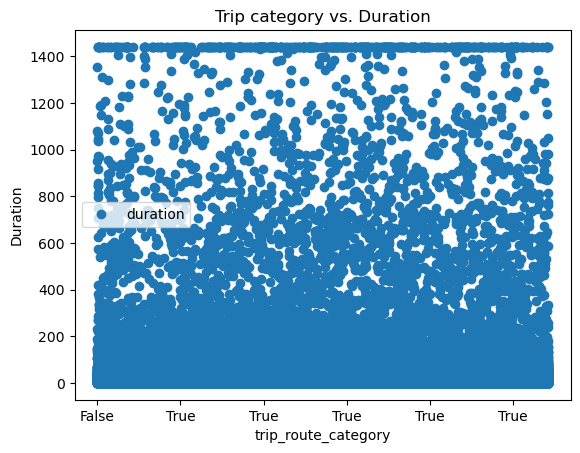

In [181]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

regression_subset.plot(x = 'trip_category_code', y='duration',style='o') 
plt.title('Trip category vs. Duration')  
plt.xlabel('trip_route_category')  
plt.ylabel('Duration')  
plt.show()

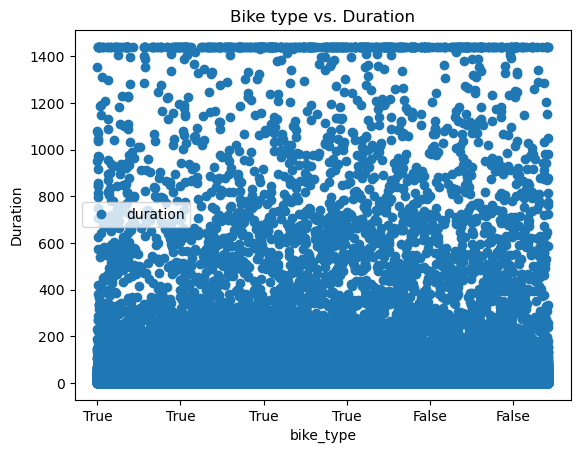

In [183]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

regression_subset.plot(x = 'bike_type_code', y='duration',style='o') 
plt.title('Bike type vs. Duration')  
plt.xlabel('bike_type')  
plt.ylabel('Duration')  
plt.show()

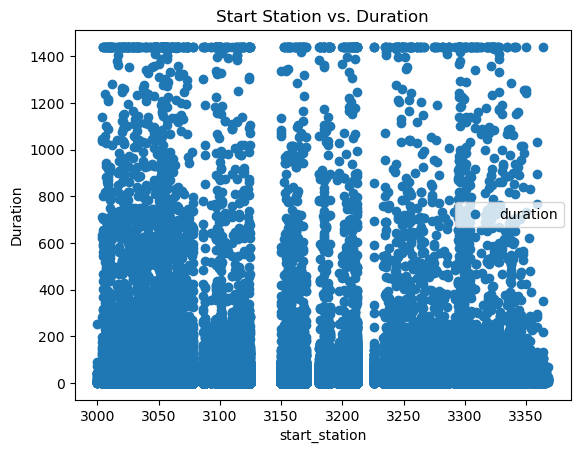

In [184]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

regression_subset.plot(x = 'start_station', y='duration',style='o') 
plt.title('Start Station vs. Duration')  
plt.xlabel('start_station')  
plt.ylabel('Duration')  
plt.show()

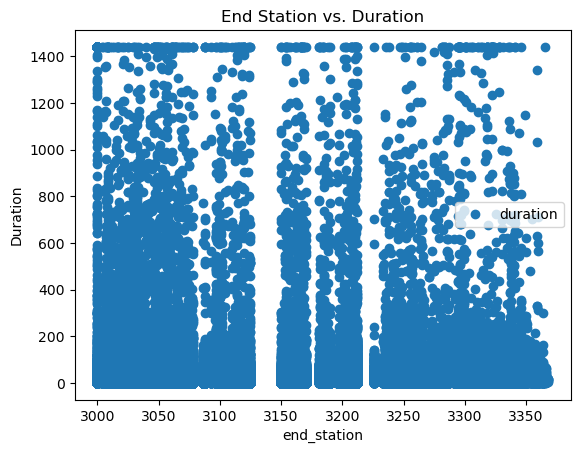

In [185]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

regression_subset.plot(x = 'end_station', y='duration',style='o') 
plt.title('End Station vs. Duration')  
plt.xlabel('end_station')  
plt.ylabel('Duration')  
plt.show()

### I see no real correlation in any of these particular variables. There are more shorter rides than longer rides overall, and then a nice stripe of full day rentals at the top.

In [189]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = regression_subset['start_station'].values.reshape(-1,1)
y = regression_subset['duration'].values.reshape(-1,1)

In [190]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression analysis

In [192]:
# Create a regression object.

regression = LinearRegression()

In [193]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [194]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

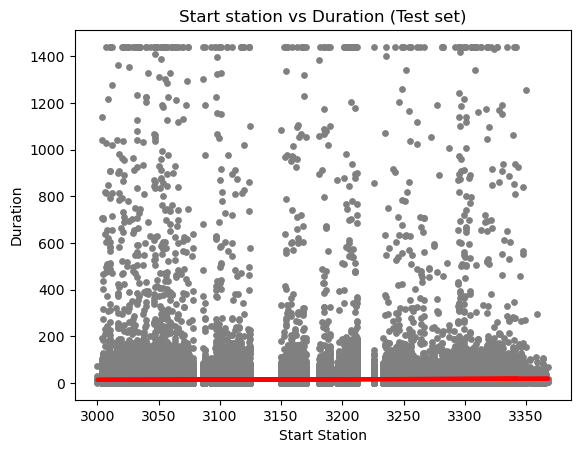

In [195]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Start station vs Duration (Test set)')
plot_test.xlabel('Start Station')
plot_test.ylabel('Duration')
plot_test.show()

In [196]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [197]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01239787]]
Mean squared error:  2217.3801768315657
R2 score:  0.0008148506016750767


### There is definitely no meaningful correlation between 'duration' and 'start_station'

In [199]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(10)

,Actual,Predicted
0,4,18.687101
1,3,15.091719
2,8,14.521417
3,11,16.405893
4,5,14.868557
5,8,15.376870
6,5,15.004934
7,9,15.054525
8,5,14.571009
9,14,18.414348


### Compare test to training

In [201]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [202]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [203]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.01239787]]
Mean squared error:  2044.0492102210453
R2 score:  0.0008215004446942009


### Still no meaningful correlation.

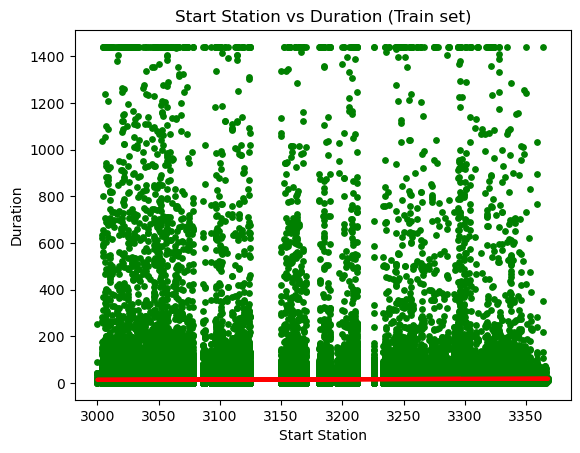

In [205]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Start Station vs Duration (Train set)')
plot_test.xlabel('Start Station')
plot_test.ylabel('Duration')
plot_test.show()

### This looks the same as before, so the data might be consistent, just no correlation between these particular variables

# Trying a different variable?

In [208]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = regression_subset['trip_category_code'].values.reshape(-1,1)
y = regression_subset['duration'].values.reshape(-1,1)

In [209]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [210]:
# Create a regression object.

regression = LinearRegression()

In [211]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [212]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

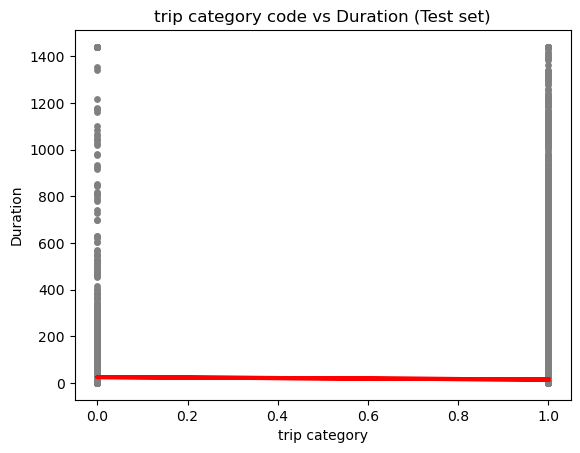

In [235]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('trip category code vs Duration (Test set)')
plot_test.xlabel('trip category')
plot_test.ylabel('Duration')
plot_test.show()